# Initial Exploration of GNN-Based Modeling 

(Discarded due to Data Constraints)

This notebook contains a preliminary attempt to model traffic severity using Graph Neural Networks (GNNs), based on the idea of treating roads as nodes and their connectivity as edges. However, the data available lacked sufficient graph structure, spatial resolution, and volume to make this approach meaningful.

As a result, the GNN direction was abandoned early in the project. This notebook is kept for documentation purposes to reflect the experimentation and iterative development process.


In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [7]:
# Loading the processed dataset
df = pd.read_csv('../data/engineered_traffic_data.csv') 
print(df)


                     road status            description            timestamp  \
0                     A24  Minor           Minor Delays  2025-03-20 06:00:00   
1                     A13   Good  No Exceptional Delays  2025-03-20 06:00:00   
2                      A2   Good  No Exceptional Delays  2025-03-20 06:00:00   
3                      A3   Good  No Exceptional Delays  2025-03-20 06:00:00   
4                     A10   Good  No Exceptional Delays  2025-03-20 06:00:00   
...                   ...    ...                    ...                  ...   
9222                  A24  Minor           Minor Delays  2025-05-17 21:00:00   
9223                  A10   Good  No Exceptional Delays  2025-05-17 21:00:00   
9224  Western Cross Route   Good  No Exceptional Delays  2025-05-17 21:00:00   
9225                 A316   Good  No Exceptional Delays  2025-05-17 21:00:00   
9226                  A21   Good  No Exceptional Delays  2025-05-17 21:00:00   

      hour   weekday  day_of_week  is_w

In [8]:
unique_roads = df['road'].unique()
print(f"Found {len(unique_roads)} roads.")


Found 23 roads.


Since Ι don’t have actual road connectivity data, Ι build a synthetic graph by connecting roads that were logged together within the same timestamp.

In [9]:
#  Initialize undirected graph
G = nx.Graph()

# Add roads as nodes
G.add_nodes_from(unique_roads)

# Heuristically create edges, roads reported together are likely adjacent
grouped = df.groupby('timestamp')

for _, group in grouped:
    roads_in_snapshot = group['road'].tolist()
    for i in range(len(roads_in_snapshot)):
        for j in range(i + 1, len(roads_in_snapshot)):
            G.add_edge(roads_in_snapshot[i], roads_in_snapshot[j])

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Graph created with 23 nodes and 253 edges


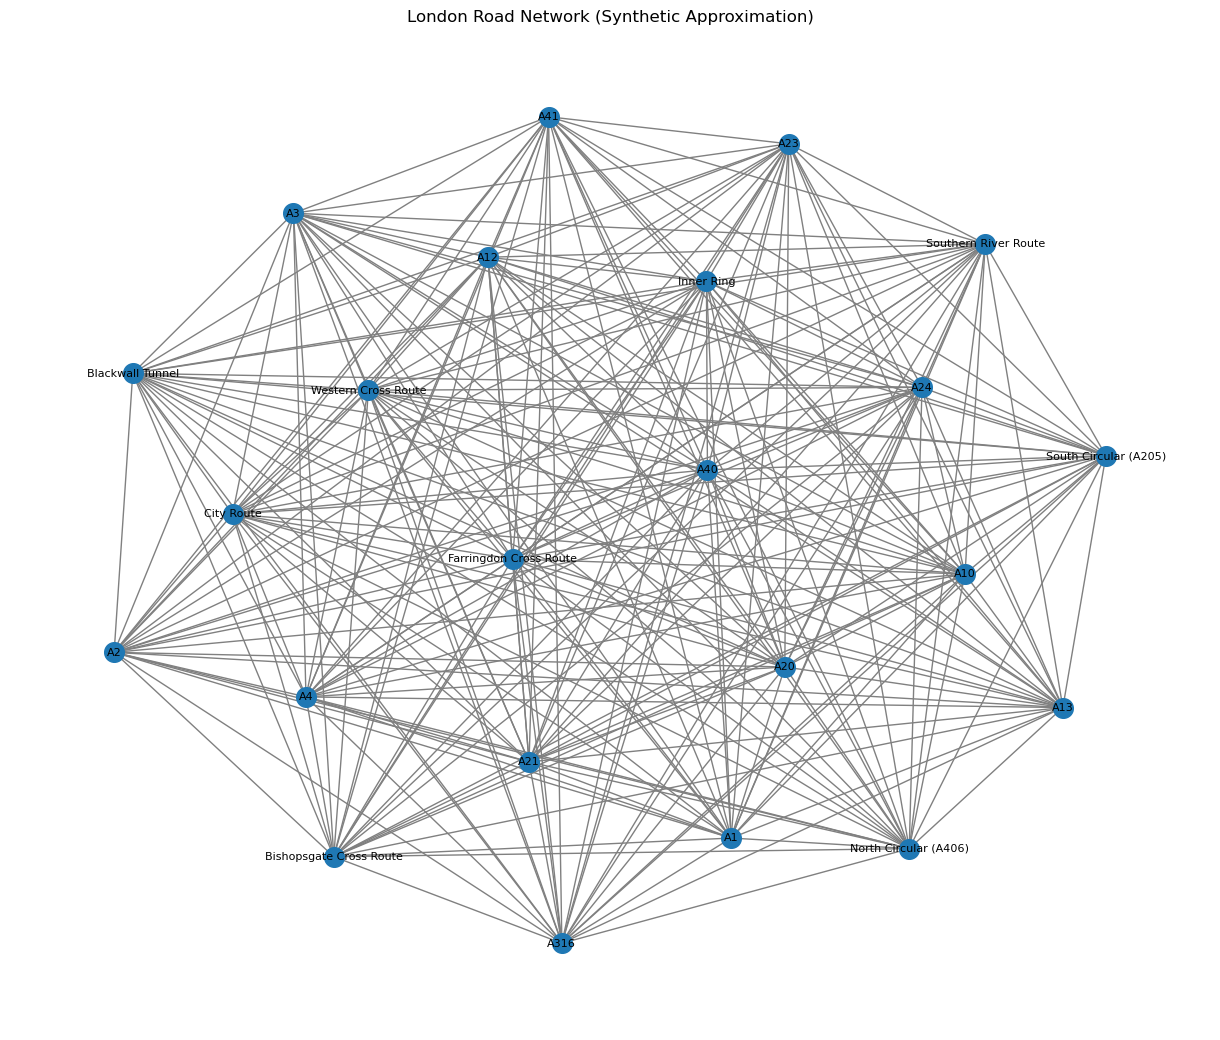

In [10]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed= 42)
nx.draw(G, pos, with_labels=True, node_size=200, font_size=8, edge_color='gray')
plt.title("London Road Network (Synthetic Approximation)")
plt.show()


Any other possible experimentation?
-  assign features to each node (e.g. mean severity per road)

- convert this into a format usable by PyTorch Geometric or DGL

- prepare it for temporal prediction 